### Install tensorflow / Keras Lib. 
#### pip install tensorflow

In [14]:
from tensorflow import keras    ## use keras API 

In [15]:
from tensorflow.keras.models import Sequential ## create a sequential model  
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense 
##  28*28 -> 8 filters of 3*3 with relu -> maxpooling -> flatten -> output 10 units with softmax
#  
model = Sequential([
    Input(shape=(28, 28, 1)),  # บอก input ที่นี่
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])


Network Summary Report

In [16]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        13,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,610 (53.16 KB)

 Trainable params: 13,610 (53.16 KB)

 Non-trainable params: 0 (0.00 B)

## Configuration the training process

In [17]:
## use optimizer = 'sgd' /  'adam', loss function = 'cross entropy loss', metrics = 'accuracy', lr = 0.0005
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0005),   # หรือ SGD(learning_rate=0.0005)
    loss='sparse_categorical_crossentropy', # ถ้า one-hot labels ให้ใช้ 'categorical_crossentropy'
    metrics=['accuracy']
)


## Training the model

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7649 - loss: 0.9316 - val_accuracy: 0.9373 - val_loss: 0.2260
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9390 - loss: 0.2147 - val_accuracy: 0.9558 - val_loss: 0.1586
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9574 - loss: 0.1538 - val_accuracy: 0.9653 - val_loss: 0.1272
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9661 - loss: 0.1212 - val_accuracy: 0.9699 - val_loss: 0.1060
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9717 - loss: 0.1012 - val_accuracy: 0.9713 - val_loss: 0.0955
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9730 - loss: 0.0949 - val_accuracy: 0.9734 - val_loss: 0.0912
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9763 - loss: 0.0855 - val_accuracy: 0.9759 - val_loss: 0.0830
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9777 - loss: 0.0786 - val_accuracy: 0.

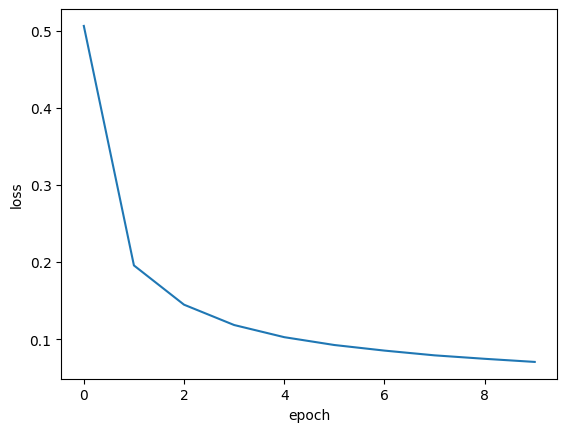

In [18]:
### epochs = 10, batch size = 64 

from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape และ normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
hist = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)   # optional ถ้าอยากดู val_loss, val_accuracy
)

import matplotlib.pyplot as plt     ### plot loss curve wrt epochs

plt.plot(hist.history['loss'])     ### you can change to accuracy curve wrt epochs
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Test predictions

In [20]:
import numpy as np
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

predictions = model.predict(test_images)

print('predicted_labels ')
print('actual labels', test_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
predicted_labels 
actual labels [7 2 1 ... 4 5 6]


## Performance evaluation

In [22]:
acc = model.evaluate (x_test, y_test)
acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9704 - loss: 0.0897


[0.07492579519748688, 0.9761000275611877]